In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename_queue = tf.train.string_input_producer(
    tf.train.match_filenames_once("/Users/yzhongta/projects/ML_Competition/RobotComp/sample_data/*.jpg"))

image_reader = tf.WholeFileReader()
labels=[1]

reader=tf.WholeFileReader()
filename, content = reader.read(filename_queue)
images=tf.image.decode_jpeg(content, channels=3)
images=tf.cast(images, tf.float32)
resized_images=tf.image.resize_images(images, (280, 280))
image_batch, label_batch=tf.train.batch([resized_images, labels], batch_size=10)

(10, 280, 280, 3)
(10, 1)


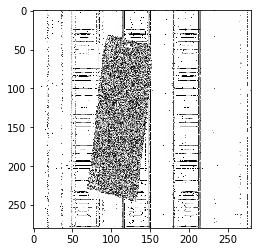

In [18]:
with tf.Session() as sess:
    # Required to get the filename matching to run.
    tf.local_variables_initializer().run()
    # Coordinate the loading of image files.
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)

    # Get an image tensor and print its value.
    x,y = sess.run([image_batch, label_batch])
    plt.imshow(x[0,:,:,:], cmap='gray')
    
    print(np.shape(x))
    print(np.shape(y))
    

    # Finish off the filename queue coordinator.
    coord.request_stop()
    coord.join(threads)